In [216]:
import quandl
import yahoo_finance as yahoo
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing, svm

In [198]:
aapl = quandl.get("WIKI/AAPL")

In [199]:
aapl

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
1980-12-12,28.75,28.87,28.75,28.750,2093900.0,0.0,1.0,0.422706,0.424470,0.422706,0.422706,117258400.0
1980-12-15,27.38,27.38,27.25,27.250,785200.0,0.0,1.0,0.402563,0.402563,0.400652,0.400652,43971200.0
1980-12-16,25.37,25.37,25.25,25.250,472000.0,0.0,1.0,0.373010,0.373010,0.371246,0.371246,26432000.0
1980-12-17,25.87,26.00,25.87,25.870,385900.0,0.0,1.0,0.380362,0.382273,0.380362,0.380362,21610400.0
1980-12-18,26.63,26.75,26.63,26.630,327900.0,0.0,1.0,0.391536,0.393300,0.391536,0.391536,18362400.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-21,175.04,175.09,171.26,171.270,35247358.0,0.0,1.0,175.040000,175.090000,171.260000,171.270000,35247358.0
2018-03-22,170.00,172.68,168.60,168.845,41051076.0,0.0,1.0,170.000000,172.680000,168.600000,168.845000,41051076.0
2018-03-23,168.39,169.92,164.94,164.940,40248954.0,0.0,1.0,168.390000,169.920000,164.940000,164.940000,40248954.0


In [200]:
aaplsm = aapl['2000':'2000']['Adj. Close']

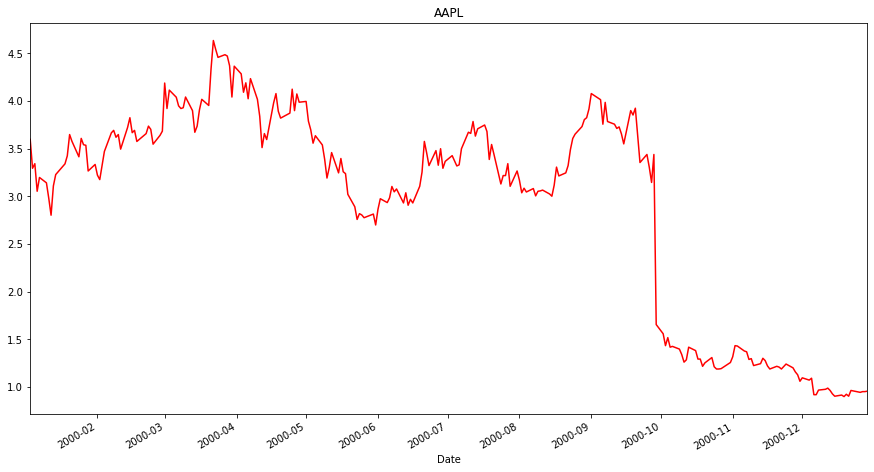

In [201]:
gp = aaplsm.plot.line(figsize=(15,8), colormap = 'flag',
                        title = 'AAPL')

Text(0, 0.5, 'Volume')

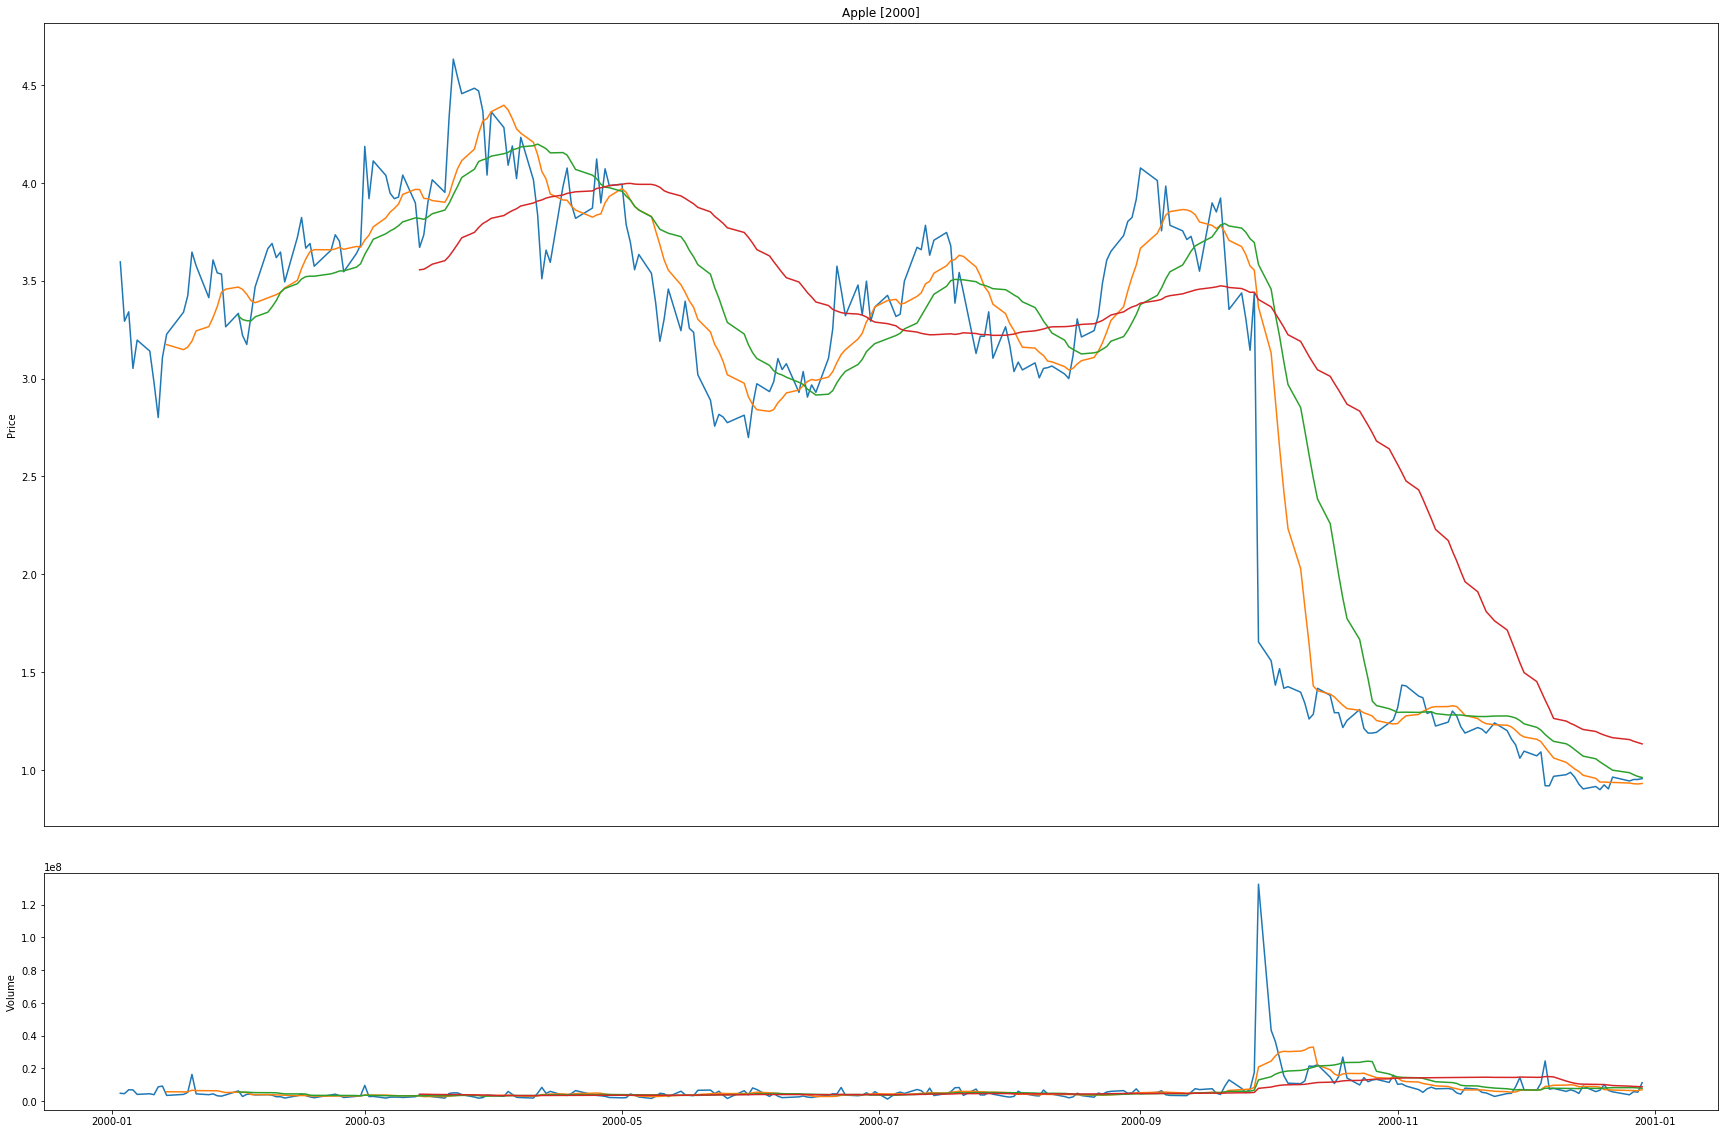

In [202]:
plt.figure(figsize=(30,20))
top = plt.subplot2grid((4,4), (0,0), rowspan=3, colspan=4)
bottom = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4)
top.plot(aaplsmsma)
bottom.plot(aaplvolsma)

top.axes.get_xaxis().set_visible(False)
top.set_title('Apple [2000]')
top.set_ylabel('Price')
bottom.set_ylabel('Volume')

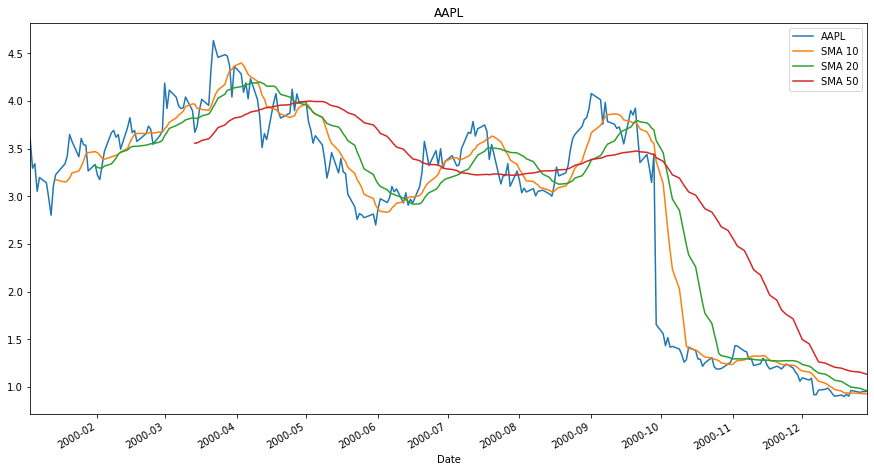

In [203]:
sma10 = aaplsm.rolling(10).mean() #10 days
sma20 = aaplsm.rolling(20).mean() #20 days
sma50 = aaplsm.rolling(50).mean() #50 days
 
aaplsmsma = pd.DataFrame({'AAPL': aaplsm, 'SMA 10': sma10, 'SMA 20': sma20, 'SMA 50': sma50})
aaplsmsma.plot(figsize=(15, 8), legend=True, title='AAPL')

Text(2015-11-24, 2.25, 'SMA 10-50')

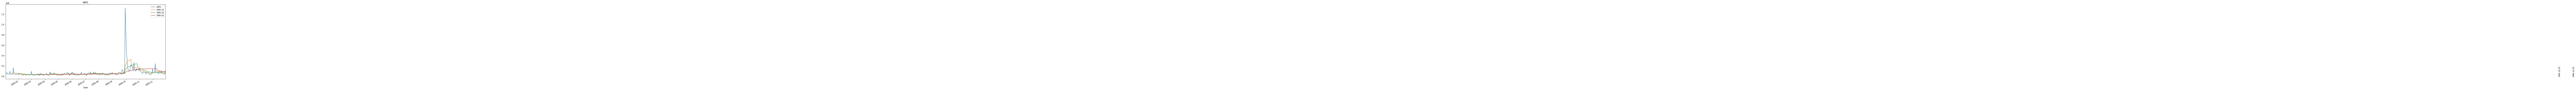

In [204]:
sma10 = aaplvol.rolling(10).mean() #10 days
sma20 = aaplvol.rolling(20).mean() #20 days
sma50 = aaplvol.rolling(50).mean() #50 days
 
aaplvolsma = pd.DataFrame({'AAPL': aaplvol, 'SMA 10': sma10, 'SMA 20': sma20, 'SMA 50': sma50})
aaplvolsma.plot(figsize=(15, 8), legend=True, title='AAPL')
 
# add vertical lines with annotations
plt.axvline(x = '2015-11-3', color = "black", lw=0.5)
plt.text('2015-10-23', 2.25, 'SMA 10-20',rotation=90)
plt.axvline(x = '2015-11-20', color = "black", lw=0.5)
plt.text('2015-11-24', 2.25, 'SMA 10-50',rotation=90)

In [205]:
aaplvol = aapl['2000':'2000']['Volume']

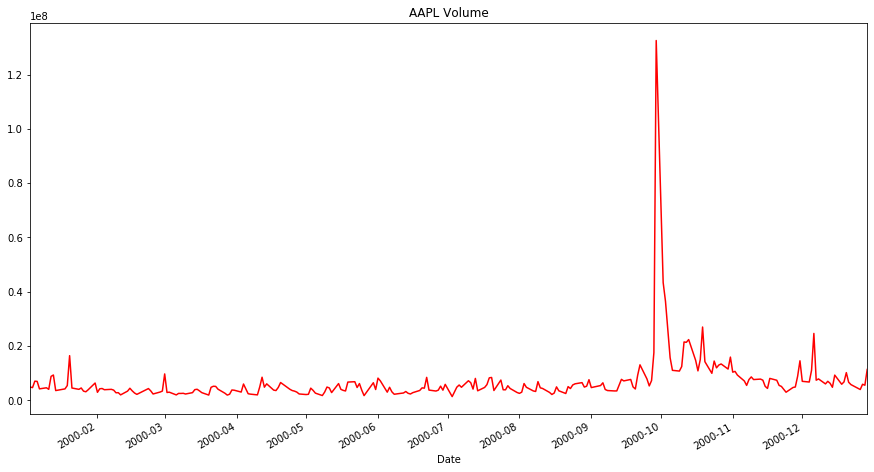

In [206]:
gp = aaplvol.plot.line(figsize=(15,8), colormap = 'flag',
                        title = 'AAPL Volume')

In [207]:
bac = quandl.get("WIKI/BAC")
bac['2009':'2009']

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2009-01-02,13.92,14.57,13.7100,14.33,86580700.0,0.0,1.0,13.028675,13.637054,12.832122,13.412422,86580700.0
2009-01-05,14.38,14.55,13.8900,13.98,93640500.0,0.0,1.0,13.459221,13.618335,13.000596,13.084833,93640500.0
2009-01-06,14.27,14.81,14.0700,14.28,111015400.0,0.0,1.0,13.356264,13.861687,13.169070,13.365624,111015400.0
2009-01-07,14.11,14.13,13.6100,13.71,112810000.0,0.0,1.0,13.206509,13.225229,12.738525,12.832122,112810000.0
2009-01-08,13.82,13.99,13.3482,13.54,93943500.0,0.0,1.0,12.935078,13.094193,12.493489,12.673007,93943500.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2009-12-24,15.23,15.28,15.2000,15.25,36611800.0,0.0,1.0,14.325193,14.372223,14.296975,14.344005,36611800.0
2009-12-28,15.31,15.41,15.1500,15.29,102573300.0,0.0,1.0,14.400440,14.494499,14.249946,14.381629,102573300.0
2009-12-29,15.30,15.33,15.1000,15.12,83089500.0,0.0,1.0,14.391034,14.419252,14.202916,14.221728,83089500.0


In [208]:
bacpc = bac['2009':'2009']['Adj. Close']

In [209]:
bacvol = bac['2009':'2009']['Volume']

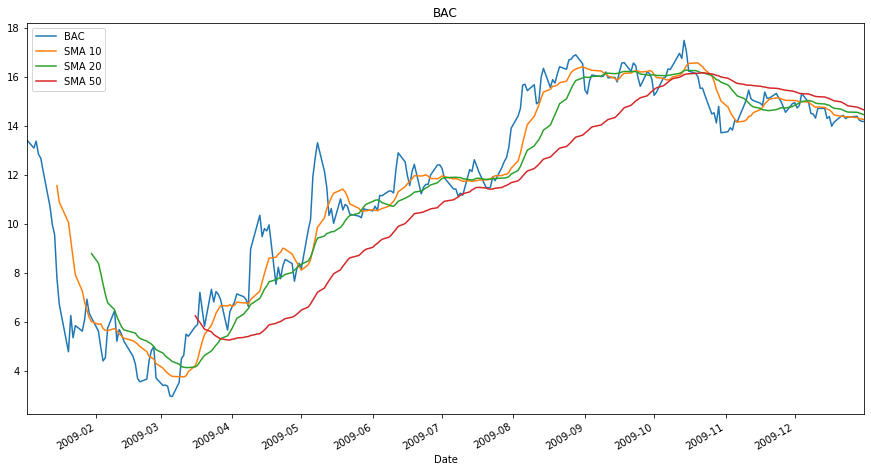

In [210]:
sma10 = bacpc.rolling(10).mean() #10 days
sma20 = bacpc.rolling(20).mean() #20 days
sma50 = bacpc.rolling(50).mean() #50 days
 
bacpcsma = pd.DataFrame({'BAC': bacpc, 'SMA 10': sma10, 'SMA 20': sma20, 'SMA 50': sma50})
bacpcsma.plot(figsize=(15, 8), legend=True, title='BAC')

Text(0, 0.5, 'Volume')

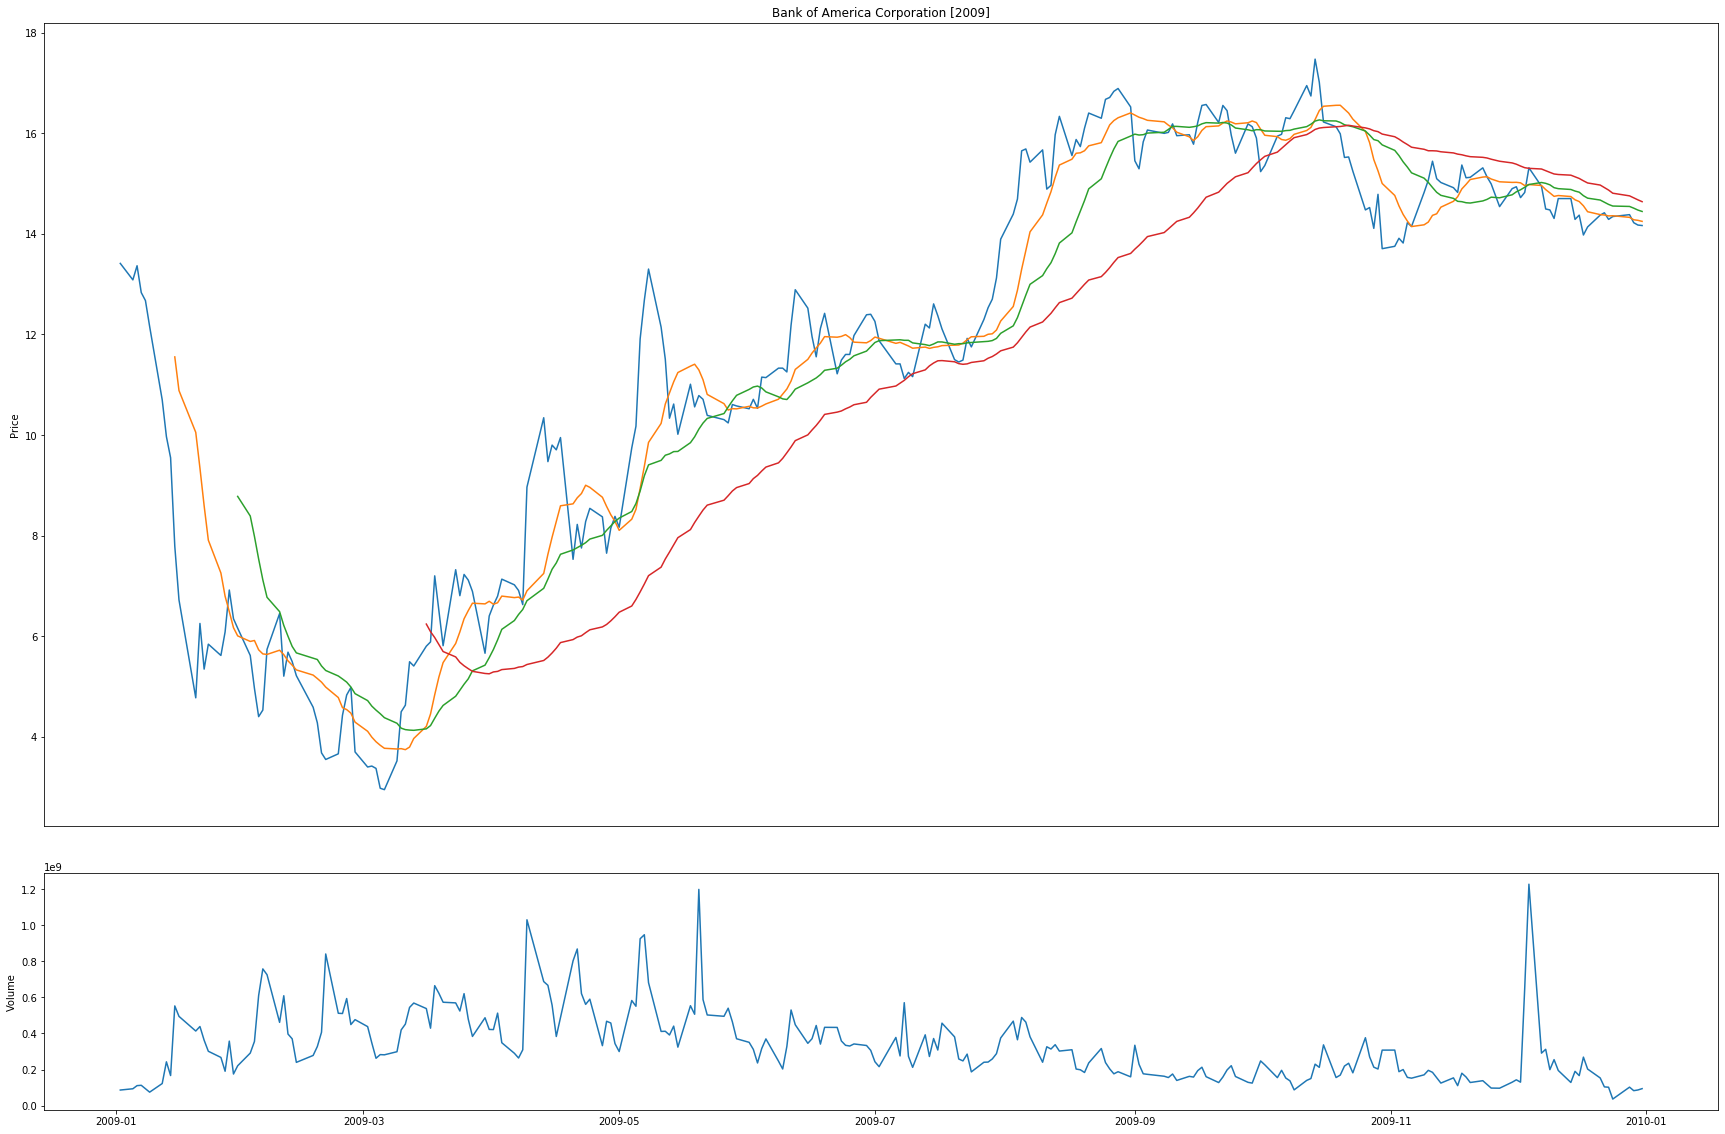

In [211]:
plt.figure(figsize=(30,20))
top = plt.subplot2grid((4,4), (0,0), rowspan=3, colspan=4)
bottom = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4)
top.plot(bacpcsma)
bottom.plot(bacvol)

top.axes.get_xaxis().set_visible(False)
top.set_title('Bank of America Corporation [2009]')
top.set_ylabel('Price')
bottom.set_ylabel('Volume')

In [212]:
jpm = quandl.get('WIKI/JPM')
jpmpc = jpm['2008':'2009']['Adj. Close']

In [213]:
def plot(stock):
    sma10 = stock.rolling(10).mean() #10 days
    sma20 = stock.rolling(20).mean() #20 days
    sma50 = stock.rolling(50).mean() #50 days
 
    stocksma = pd.DataFrame({'JPM': stock, 'SMA 10': sma10, 'SMA 20': sma20, 'SMA 50': sma50})
    stocksma.plot(figsize=(15, 8), legend=True, title='JP Morgan Chase')

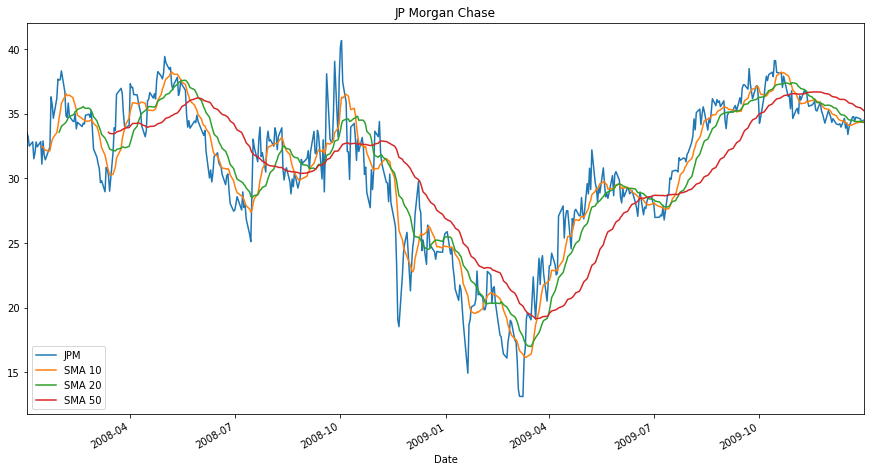

In [214]:
plot(jpmpc)

In [242]:
bac = quandl.get("WIKI/BAC")
jpm = quandl.get("WIKI/JPM")
c = quandl.get("WIKI/C")
wfc = quandl.get("WIKI/WFC")

In [247]:
bacpc = bac['2008':'2009']['Adj. Close']
jpmpc = jpm['2008':'2009']['Adj. Close']
cpc = c['2008':'2009']['Adj. Close']
wfcpc = wfc['2008':'2009']['Adj. Close']

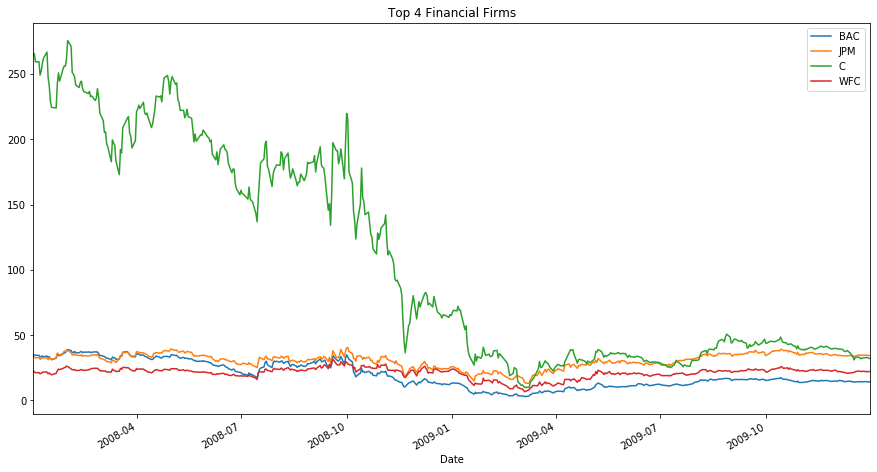

In [253]:
top4 = pd.DataFrame({'BAC': bacpc, 'JPM': jpmpc, 'C': cpc, 'WFC': wfcpc})
top4.plot(figsize = (15,8), legend = True, title = 'Top 4 Financial Firms')
plt.savefig('4firms', bbox_inches='tight')

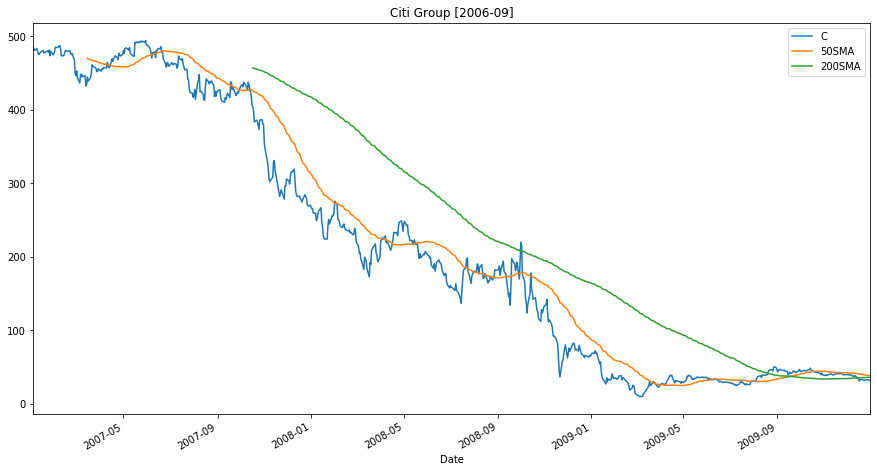

In [288]:
cpast = c['2007':'2009']['Adj. Close']
sma200 = cpast.rolling(200).mean()
sma50 = cpast.rolling(50).mean()
cpas = pd.DataFrame({'C': cpast, '50SMA': sma50, '200SMA': sma200})
cpas.plot(figsize = (15,8), legend = True, title = 'Citi Group [2006-09]')
plt.savefig('C', bbox_inches='tight')

In [262]:
cpast.mean()

265.6685326380167

In [266]:
cpast.std()

172.44249648720992

In [267]:
cpast.median()

268.85184020543

In [269]:
cpast.min()

9.8938923647076

In [270]:
cpast.max()

494.96739329419

In [275]:
cpast.idxmin()

Timestamp('2009-03-05 00:00:00')

In [283]:
gs = quandl.get("WIKI/GS")

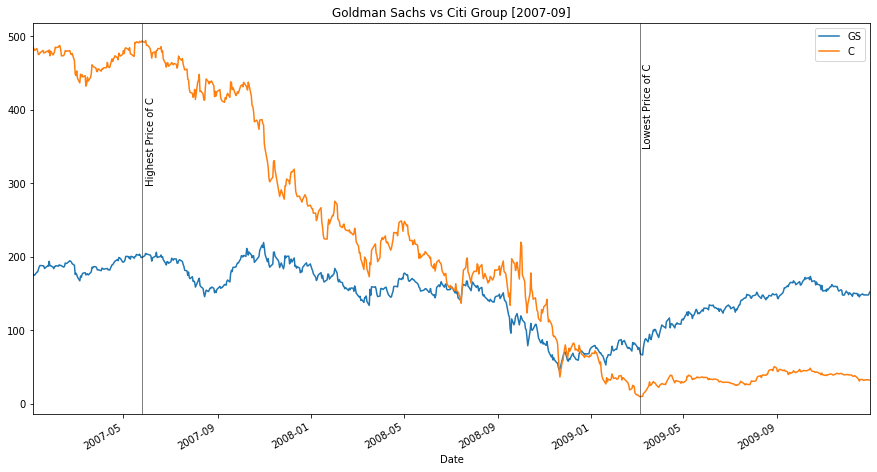

In [304]:
gspc = gs['2007':'2009']['Adj. Close']
sma200 = gspc.rolling(200).mean()
sma50 = gspc.rolling(50).mean()
gspcs = pd.DataFrame({'GS': gspc, 'C': cpast})
gspcs.plot(figsize = (15,8), legend = True, title = 'Goldman Sachs vs Citi Group [2007-09]')

plt.axvline(x = '2009-3-5', color = "black", lw=0.5)
plt.text('2009-3-10', 350, 'Lowest Price of C',rotation=90)
plt.axvline(x = '2007-5-25', color = "black", lw=0.5)
plt.text('2007-5-30', 300, 'Highest Price of C',rotation=90)

plt.savefig('GS vs C', bbox_inches='tight')

In [338]:
gdp = pd.read_csv('data/gdp-percent-yearly.csv', header = 0, index_col=0)
gdppast = gdp[76:80]

C:\Users\bhavi\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  after removing the cwd from sys.path.


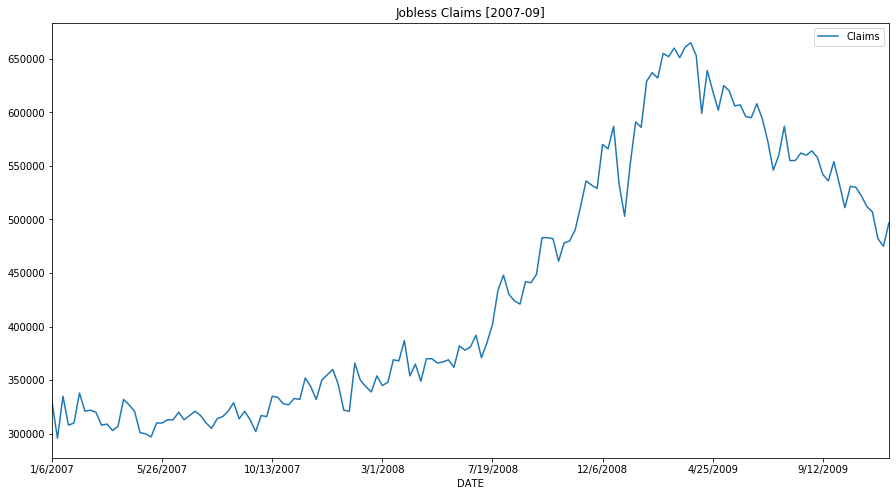

In [342]:
jobless = pd.read_csv('data/jobless.csv', header = 0, index_col = 0)
jobless[2087:2240].plot(figsize = (15,8), legend = True, title = 'Jobless Claims [2007-09]')
plt.savefig('Jobless', bbox_inches = 'tight')


In [354]:
jobless.past = jobless[2087:2240]
stats = pd.DataFrame({'Min': jobless.past.min(), 'D-Min': jobless.past.idxmin(), 'Max': jobless.past.max(), 'D-Max': jobless.past.idxmax(), 'Mean': jobless.past.mean()})
stats

,Min,D-Min,Max,D-Max,Mean
Claims,296000,1/13/2007,665000,3/28/2009,436607.843137


In [224]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

In [225]:
amazon = quandl.get("WIKI/AMZN")
print(amazon.head())

             Open   High    Low  Close     Volume  Ex-Dividend  Split Ratio  \
Date                                                                          
1997-05-16  22.38  23.75  20.50  20.75  1225000.0          0.0          1.0   
1997-05-19  20.50  21.25  19.50  20.50   508900.0          0.0          1.0   
1997-05-20  20.75  21.00  19.63  19.63   455600.0          0.0          1.0   
1997-05-21  19.25  19.75  16.50  17.13  1571100.0          0.0          1.0   
1997-05-22  17.25  17.38  15.75  16.75   981400.0          0.0          1.0   

            Adj. Open  Adj. High  Adj. Low  Adj. Close  Adj. Volume  
Date                                                                 
1997-05-16   1.865000   1.979167  1.708333    1.729167   14700000.0  
1997-05-19   1.708333   1.770833  1.625000    1.708333    6106800.0  
1997-05-20   1.729167   1.750000  1.635833    1.635833    5467200.0  
1997-05-21   1.604167   1.645833  1.375000    1.427500   18853200.0  
1997-05-22   1.437500   1.

In [226]:
amazon = amazon[['Adj. Close']]
print(amazon.head())

            Adj. Close
Date                  
1997-05-16    1.729167
1997-05-19    1.708333
1997-05-20    1.635833
1997-05-21    1.427500
1997-05-22    1.395833


In [229]:
forecast_len = 30

amazon['Predicted']=amazon[['Adj. Close']].shift(-forecast_len)
print(amazon.tail())

            Adj. Close  Predicted
Date                             
2018-03-21     1581.86        NaN
2018-03-22     1544.10        NaN
2018-03-23     1495.56        NaN
2018-03-26     1555.86        NaN
2018-03-27     1497.05        NaN


In [230]:
x = np.array(amazon.drop(['Predicted'],1))
x=x[:-forecast_len]
print(x)

[[   1.72916667]
 [   1.70833333]
 [   1.63583333]
 ...
 [1350.47      ]
 [1338.99      ]
 [1386.23      ]]


In [231]:
y=np.array(amazon['Predicted'])
y=y[:-forecast_len]
print(y)

[1.54166667e+00 1.51583333e+00 1.58833333e+00 ... 1.49556000e+03
 1.55586000e+03 1.49705000e+03]


In [232]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2)

In [233]:
svr_rbf=SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_rbf.fit(x_train, y_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [235]:
svr_rbf_confidence=svr_rbf.score(x_test,y_test)
print(f"SVR Confidence: {round(svr_rbf_confidence*100,2)}%")

SVR Confidence: 96.1%


In [237]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [238]:
lr_confidence = lr.score(x_test, y_test)
print(f"Linear Regression Confidence: {round(lr_confidence*100,2)}%")

Linear Regression Confidence: 98.76%


AttributeError: 'numpy.ndarray' object has no attribute 'plot'